In [247]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import MultipleLocator, LogLocator


def ax_setting(ax, fontsize, xmin=None, xmax=None, ymin=None, ymax=None, scale='linear'):
    linewidth = 1.5
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.spines['left'].set_linewidth(linewidth)
    ax.minorticks_on() # 補助目盛りを表示する
    ax.grid(which="both") # デフォルトでは主目盛り線のみ罫線が引かれる
    
    # 主目盛
    ax.tick_params(axis='both', which='major', width=linewidth, labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', width=linewidth)
    
    if xmin is not None and xmax is not None:
        ax.set_xlim(xmin, xmax)
    if ymin is not None and ymax is not None:
        ax.set_ylim(ymin, ymax)

    if scale == 'xlog':
        ax.set_xscale('log')
    elif scale == 'ylog':
        ax.set_yscale('log')
    elif scale == 'loglog':
        ax.set_xscale('log')
        ax.set_yscale('log')
    #else:
        #ax.set_xscale('linear')
        #ax.set_yscale('linear')

# 罫線（グリッド線）を描画し、最背面に配置
    ax.grid(True, which='major', linewidth=0.5, color='k', alpha=0.2, zorder=0)
    ax.grid(True, which='minor', linewidth=0.3, color='k', alpha=0.2, zorder=0)


def scatter_plot(ax, x, y, color):
    ax.scatter(x, y, color=color)


def plot_regression_with_ci(ax, x, y, color='blue', fontsize=12, force_intercept_zero=False, text_loc=(0.95, 0.95)):
    # 回帰計算
    if force_intercept_zero:
        a = np.sum(x * y) / np.sum(x ** 2)
        y_pred = a * x
        r2 = np.sum((a * x) ** 2) / np.sum(y ** 2)
        b = 0
    else:
        a, b = np.polyfit(x, y, 1)
        y_pred = a * x + b
        r = np.corrcoef(x, y)[0, 1]
        r2 = r ** 2

    # 回帰直線描画用データ
    x_line = np.linspace(np.min(x), np.max(x), 100)
    if force_intercept_zero:
        y_line = a * x_line
    else:
        y_line = a * x_line + b

    # 信頼区間の計算
    n = len(x)
    dof = n - (1 if force_intercept_zero else 2)
    tval = stats.t.ppf(0.975, dof)

    y_fit = a * x + (0 if force_intercept_zero else b)
    se = np.sqrt(np.sum((y - y_fit) ** 2) / dof)
    mean_x = np.mean(x)
    s_xx = np.sum((x - mean_x) ** 2) if not force_intercept_zero else np.sum(x ** 2)

    ci = tval * se * np.sqrt(1 / n + (x_line - (0 if force_intercept_zero else mean_x)) ** 2 / s_xx)

    # 描画
    ax.fill_between(x_line, y_line - ci, y_line + ci, color=color, alpha=0.2, label="95% CI")
    ax.plot(x_line, y_line, color=color, linewidth=1.5, label='回帰直線')

    # 式とR^2の表示
    if force_intercept_zero:
        formula = f"$y = {a:.2f}x$\n$R^2 = {r2:.2f}$"
    else:
        formula = f"$y = {a:.2f}x + {b:.2f}$\n$R^2 = {r2:.2f}$"

    ax.text(text_loc[0], text_loc[1], formula, transform=ax.transAxes,
            fontsize=fontsize, ha='right', va='top',
            fontdict={"math_fontfamily": "cm"})

    return


In [255]:
x = np.linspace(-10, 10, 50)
y_random = 2*x + np.random.randn(50)*2
#y = np.linspace(0, 10, 100)
#y_random = y + np.random.randn(200)

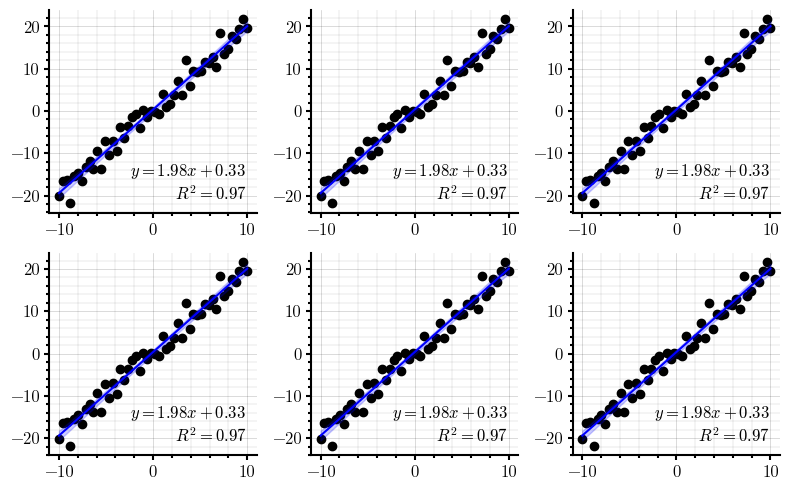

In [256]:
# LaTeXモードでComputer Modernを有効にする
#plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', serif='CMU Serif')

figs, axes = plt.subplots(2, 3, figsize=(8, 5))

for ax in axes.flatten():
    ax_setting(ax, fontsize=12)
    scatter_plot(ax, x, y_random, color='k')
    plot_regression_with_ci(ax, x, y_random, text_loc=(0.95, 0.25))

plt.tight_layout()
plt.show()

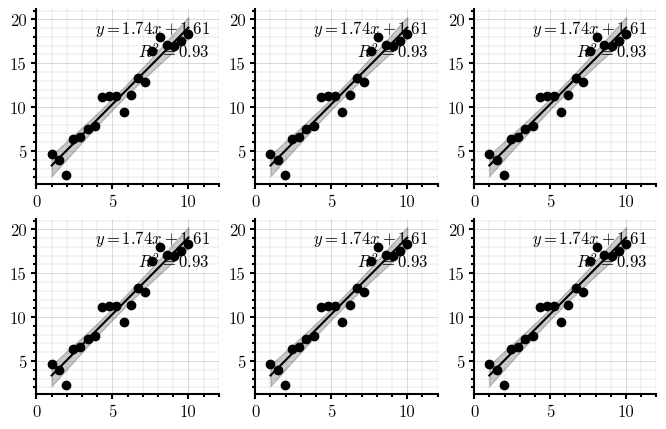

In [264]:
from plot_util import PlotManager
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 10, 20)
y = 2 * x + np.random.normal(0, 2, len(x))

fig, axes = plt.subplots(2, 3, figsize=(8, 5))
for ax in axes.flatten():
    pm = PlotManager(ax, fontsize=12, scale='linear', xmin=0, xmax=12)
    pm.ax_setting()
    pm.scatter_plot(x, y, color='k')
    pm.plot_regression_with_ci(x, y, color='k')

plt.show()